In [29]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import time
import threading
from mlxtend.frequent_patterns import apriori, fpgrowth


### reading the dataset

In [32]:
df = pd.read_csv(r"C:\Users\chris\Downloads\Groceries_dataset - Groceries_dataset.csv")

In [34]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


###getting all the unique values in the dataset with their counts


In [37]:
unique_values = df['itemDescription'].value_counts()

# Print the result
print(unique_values)

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64


### histogram to represent every element's frequency in the dataset

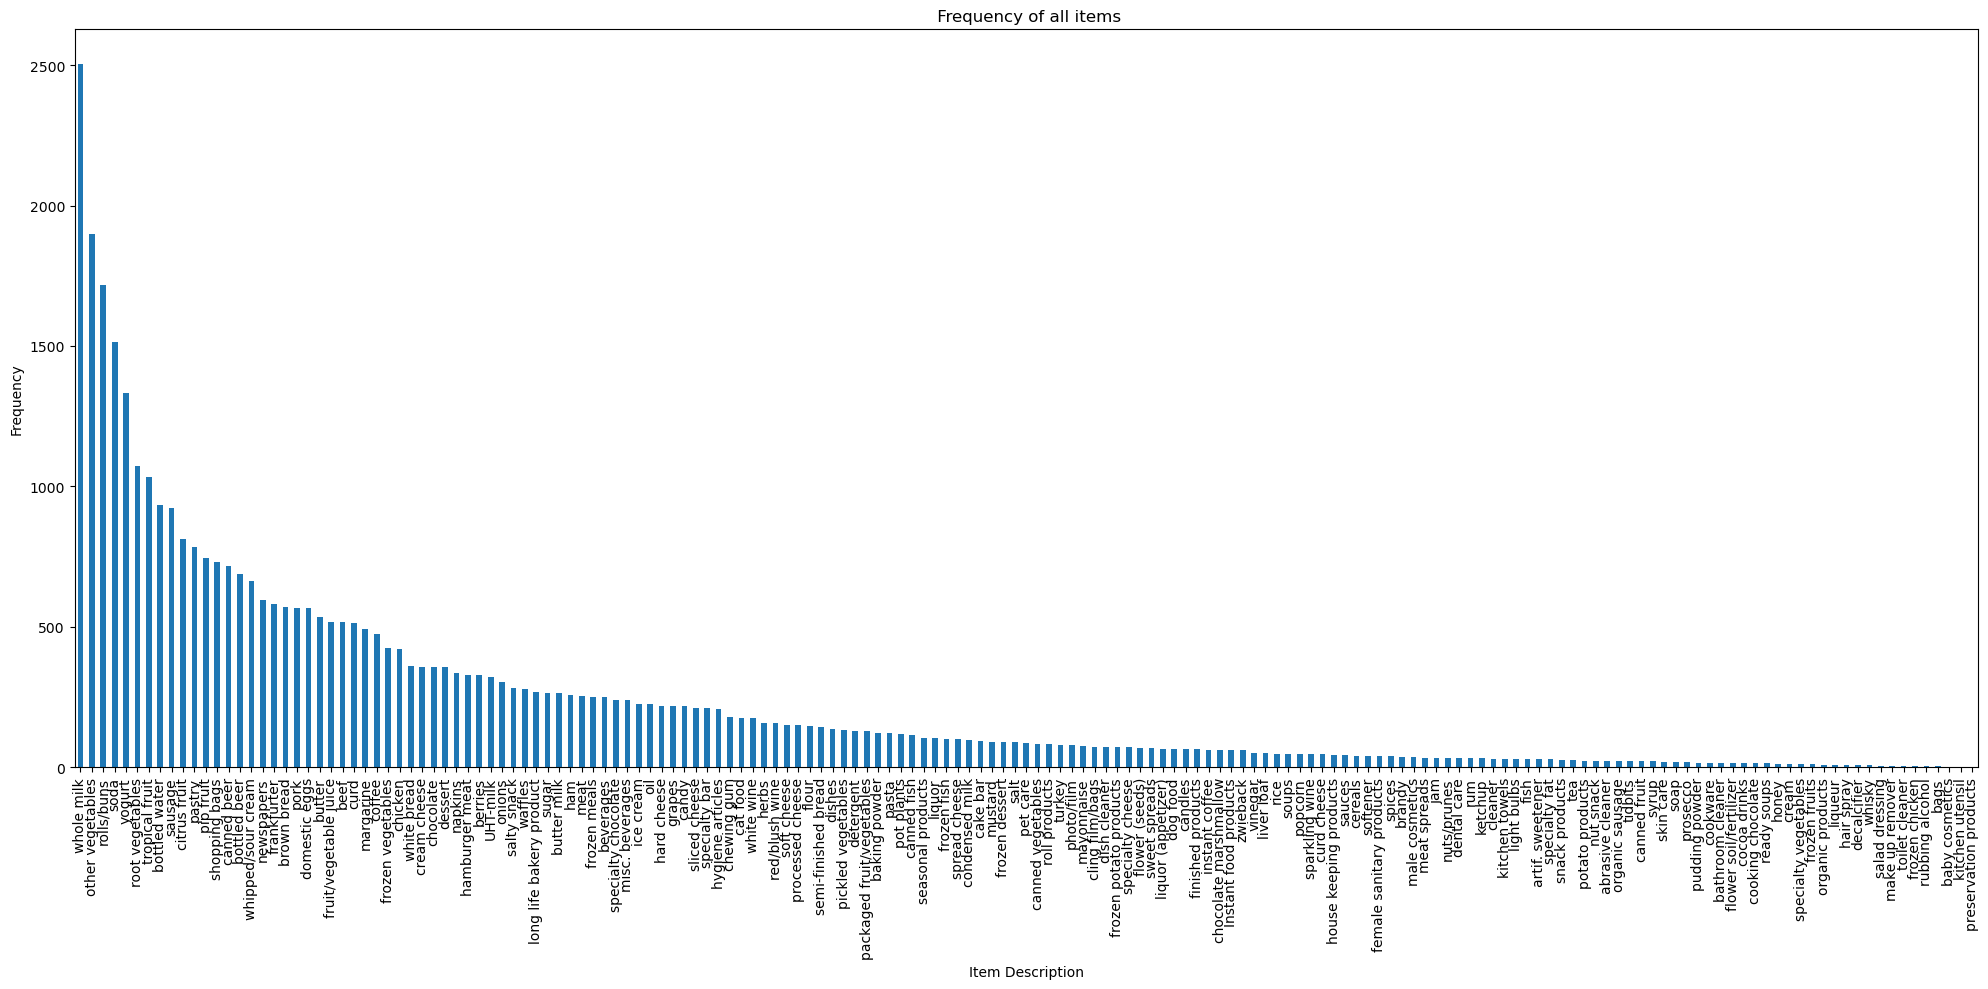

In [39]:
df['itemDescription'].value_counts().plot(kind='bar', figsize=(20,10), title=' Frequency of all items', xlabel='Item Description', ylabel='Frequency', rot=90).get_figure().tight_layout()

## histogram to show 10 most popular items

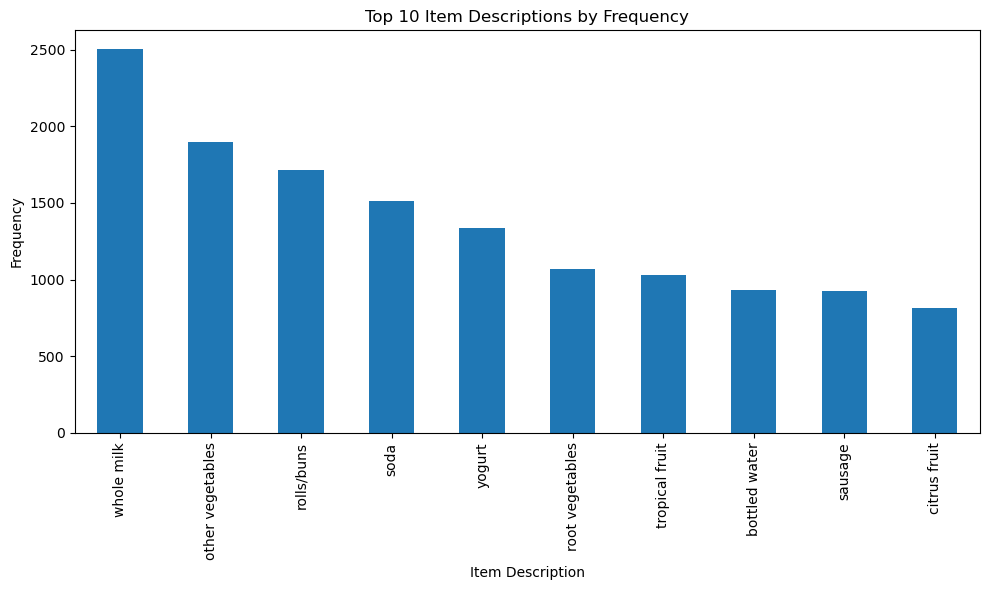

In [42]:
df['itemDescription'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,6), title='Top 10 Item Descriptions by Frequency', xlabel='Item Description', ylabel='Frequency', rot=90).get_figure().tight_layout()

# pie chart

<Axes: title={'center': 'Top 10 Item Descriptions by Frequency'}, ylabel='count'>

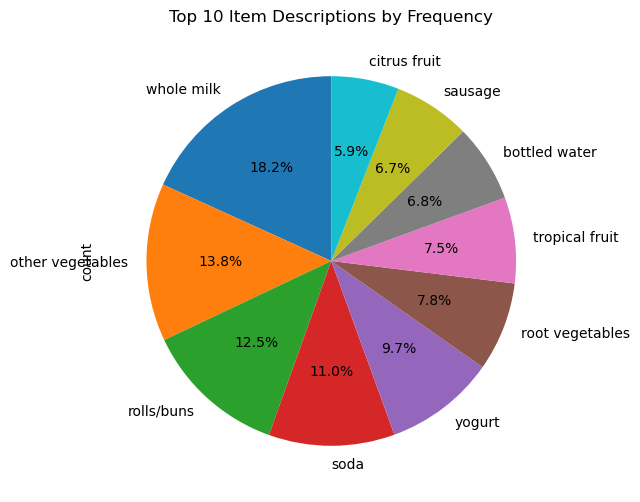

In [45]:
df['itemDescription'].value_counts().nlargest(10).plot(kind='pie', figsize=(8,6), autopct='%1.1f%%', startangle=90, title='Top 10 Item Descriptions by Frequency')

In [47]:
executiontime = [0, 0]
apriori_completed = threading.Event()
fp_completed = threading.Event()

In [49]:
#transaction = unique_combinations['itemDescription'].tolist()
#transaction[0]
transaction =[]
for index, row in df.iterrows():
    transaction.append(row.dropna().tolist())

# creating a new dataframe

In [51]:
new_df = df['itemDescription'].value_counts().to_frame('count').T

In [52]:
new_df

itemDescription,whole milk,other vegetables,rolls/buns,soda,yogurt,root vegetables,tropical fruit,bottled water,sausage,citrus fruit,...,whisky,salad dressing,make up remover,toilet cleaner,frozen chicken,rubbing alcohol,bags,baby cosmetics,kitchen utensil,preservation products
count,2502,1898,1716,1514,1334,1071,1032,933,924,812,...,8,6,5,5,5,5,4,3,1,1


In [56]:
transaction_df = pd.DataFrame(transaction)

In [58]:
one_hot_encoded = pd.get_dummies(transaction_df.stack()).groupby(level=0).sum()
transaction_encoded = (one_hot_encoded > 0 ).astype(int)

In [59]:
print(transaction_encoded)

       1000  1001  1002  1003  1004  1005  1006  1008  1009  1010  ...  \
0         0     0     0     0     0     0     0     0     0     0  ...   
1         0     0     0     0     0     0     0     0     0     0  ...   
2         0     0     0     0     0     0     0     0     0     0  ...   
3         0     0     0     0     0     0     0     0     0     0  ...   
4         0     0     0     0     0     0     0     0     0     0  ...   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
38760     0     0     0     0     0     0     0     0     0     0  ...   
38761     0     0     0     0     0     0     0     0     0     0  ...   
38762     0     0     0     0     0     0     0     0     0     0  ...   
38763     0     0     0     0     0     0     0     0     0     0  ...   
38764     0     0     0     0     0     0     0     0     0     0  ...   

       turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0           0        0        0    

In [33]:
executiontime = [0, 0]
apriori_completed = threading.Event()
fp_completed = threading.Event()

In [29]:
def run_apriori():
    stime = time.time()
    apriori_results = apriori(transaction_encoded, min_support=0.02, use_colnames=True)
    executiontime[0] = time.time() - stime
    apriori_completed.set()

In [31]:
def run_fp():
    stime = time.time()
    fp_results = fpgrowth(transaction_encoded, min_support=0.02, use_colnames=True)
    executiontime[1] = time.time() - stime
    fp_completed.set()

### threads to run both the functions simulataneously

In [21]:
apriori_thread = threading.Thread(target=run_apriori)
fp_thread = threading.Thread(target=run_fp)

In [23]:
apriori_thread.start()
fp_thread.start()

# Wait for the threads to signal completion
apriori_completed.wait()
fp_completed.wait()

# Join the threads to ensure they have finished
apriori_thread.join()
fp_thread.join()

# Print execution times
print(f"Apriori execution time: {executiontime[0]} seconds")
print(f"FP-Growth execution time: {executiontime[1]} seconds")

C:\Users\chris\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\chris\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori execution time: 0.8147273063659668 seconds
FP-Growth execution time: 1.2288923263549805 seconds


### bar graph displaying the speeds of FP-GROWTH AND apriori

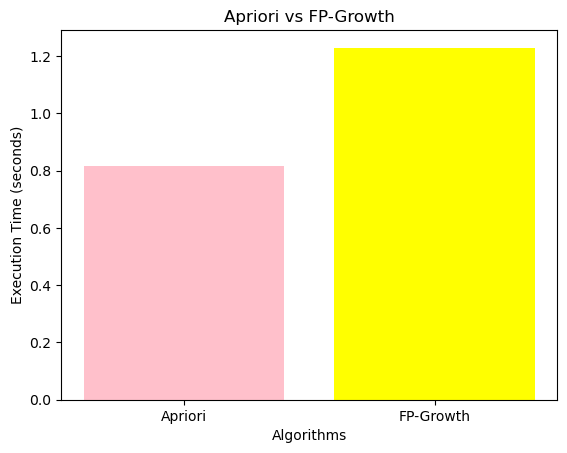

Apriori is Faster


In [29]:
import matplotlib.pyplot as plt
algorithms = ['Apriori', 'FP-Growth']
plt.bar(algorithms, executiontime, color=['pink', 'yellow'])
plt.xlabel('Algorithms')
plt.ylabel('Execution Time (seconds)')
plt.title('Apriori vs FP-Growth')
plt.show()

# Compare execution times
if executiontime[0] < executiontime[1]:
    print("Apriori is Faster")
elif executiontime[1] < executiontime[0]:
    print("FP-Growth is Faster")
else:
    print("Both are equal")

In [62]:
def encode(x):
    if x <=0:
        return 0
    elif x>=0:
        return 1
basket = transaction_encoded.applymap(encode)

In [63]:
df['quantity'] = 1

In [64]:
df

,Member_number,Date,itemDescription,quantity
0,1808,21-07-2015,tropical fruit,1
1,2552,05-01-2015,whole milk,1
2,2300,19-09-2015,pip fruit,1
3,1187,12-12-2015,other vegetables,1
4,3037,01-02-2015,whole milk,1
...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,1
38761,2022,23-02-2014,candy,1
38762,1097,16-04-2014,cake bar,1
38763,1510,03-12-2014,fruit/vegetable juice,1


In [65]:
transactions =  df.groupby(['Member_number','itemDescription'])['quantity'].sum().unstack().reset_index().set_index('Member_number')

In [66]:
transactions

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
transactions = transactions.fillna(0)

In [68]:
def encode(x):
    if x <=0:
        return 0
    elif x>=0:
        return 1
basket = transactions.applymap(encode)

In [69]:
pip install warning

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warning (from versions: none)
ERROR: No matching distribution found for warning


### applying the association rules

In [70]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemset = apriori(basket,min_support=0.06,use_colnames=True)
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)

In [71]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
1,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,0.009360,1.023754,0.269364
2,(other vegetables),(bottled beer),0.376603,0.158799,0.068497,0.181880,1.145345,0.008692,1.028212,0.203563
3,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857
4,(rolls/buns),(bottled beer),0.349666,0.158799,0.063109,0.180484,1.136555,0.007582,1.026461,0.184748
...,...,...,...,...,...,...,...,...,...,...
153,"(rolls/buns, whole milk)",(yogurt),0.178553,0.282966,0.065931,0.369253,1.304939,0.015407,1.136802,0.284474
154,"(whole milk, yogurt)",(rolls/buns),0.150590,0.349666,0.065931,0.437819,1.252106,0.013275,1.156805,0.237041
155,(rolls/buns),"(whole milk, yogurt)",0.349666,0.150590,0.065931,0.188555,1.252106,0.013275,1.046786,0.309603
156,(yogurt),"(rolls/buns, whole milk)",0.282966,0.178553,0.065931,0.233001,1.304939,0.015407,1.070988,0.325899


## getting the support and confidence of all the elements

In [72]:
eda_rules = rules[['antecedents','consequents','support','confidence']]
eda_rules

,antecedents,consequents,support,confidence
0,(beef),(whole milk),0.064135,0.536481
1,(whole milk),(beef),0.064135,0.139978
2,(other vegetables),(bottled beer),0.068497,0.181880
3,(bottled beer),(other vegetables),0.068497,0.431341
4,(rolls/buns),(bottled beer),0.063109,0.180484
...,...,...,...,...
153,"(rolls/buns, whole milk)",(yogurt),0.065931,0.369253
154,"(whole milk, yogurt)",(rolls/buns),0.065931,0.437819
155,(rolls/buns),"(whole milk, yogurt)",0.065931,0.188555
156,(yogurt),"(rolls/buns, whole milk)",0.065931,0.233001


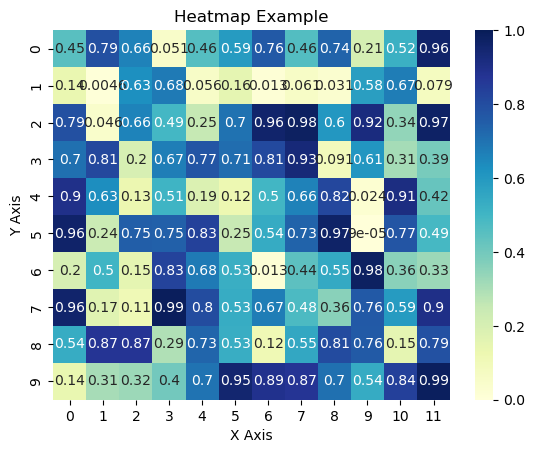

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a sample datas
eda_rules = np.random.rand(10, 12)

# Create a heatmap
sns.heatmap(eda_rules, annot=True, cmap="YlGnBu", vmin=0, vmax=1)

# Add title and labels
plt.title("Heatmap Example")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

# Show the plot
plt.show()

## providing a option where the user can input the min_support and threshold

In [83]:
print('min_support:')
a = float(input())
print('your new min_support is ', a)

min_support:


 0.02


your new min_support is  0.02


In [95]:
print('threshold')
b = int(input())
print('your new threshold is' ,b)

threshold


 1


your new threshold is 1


In [97]:
frequent_itemset = apriori(basket,min_support=a,use_colnames=True)
rules = association_rules(frequent_itemset,metric='lift',min_threshold=b)

In [99]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(UHT-milk),0.213699,0.078502,0.021293,0.099640,1.269268,0.004517,1.023477,0.269801
1,(UHT-milk),(bottled water),0.078502,0.213699,0.021293,0.271242,1.269268,0.004517,1.078960,0.230217
2,(other vegetables),(UHT-milk),0.376603,0.078502,0.038994,0.103542,1.318979,0.009430,1.027933,0.387936
3,(UHT-milk),(other vegetables),0.078502,0.376603,0.038994,0.496732,1.318979,0.009430,1.238697,0.262440
4,(rolls/buns),(UHT-milk),0.349666,0.078502,0.031042,0.088775,1.130863,0.003592,1.011274,0.177939
...,...,...,...,...,...,...,...,...,...,...
2951,"(soda, whole milk)","(rolls/buns, yogurt)",0.151103,0.111339,0.024628,0.162988,1.463889,0.007804,1.061706,0.373294
2952,(rolls/buns),"(whole milk, soda, yogurt)",0.349666,0.054387,0.024628,0.070433,1.295035,0.005611,1.017262,0.350312
2953,(yogurt),"(rolls/buns, soda, whole milk)",0.282966,0.065162,0.024628,0.087035,1.335684,0.006190,1.023959,0.350499
2954,(soda),"(rolls/buns, whole milk, yogurt)",0.313494,0.065931,0.024628,0.078560,1.191540,0.003959,1.013705,0.234157
